# 211: Linear Regression

In [1]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

# I. Wrangle Data

## Import Data

In [2]:
import pandas as pd

df = pd.read_csv(DATA_PATH + 'condos/tribeca.csv',
                 parse_dates=['SALE_DATE'],
                 index_col='SALE_DATE',
                 dtype={'ZIP_CODE': 'object',
                        'SALE_PRICE': float,
                        'YEAR_BUILT': int})

## EDA

In [3]:
df.shape

(90, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2019-01-03 to 2019-04-30
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NEIGHBORHOOD             90 non-null     object 
 1   BUILDING_CLASS_CATEGORY  90 non-null     object 
 2   ADDRESS                  90 non-null     object 
 3   APARTMENT_NUMBER         90 non-null     object 
 4   ZIP_CODE                 90 non-null     object 
 5   GROSS_SQUARE_FEET        90 non-null     float64
 6   YEAR_BUILT               90 non-null     int64  
 7   SALE_PRICE               90 non-null     float64
dtypes: float64(2), int64(1), object(5)
memory usage: 6.3+ KB


In [5]:
df.head()

,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE
SALE_DATE,,,,,,,,
2019-01-03,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"181 HUDSON STREET, 6D",6D,10013.0,1840.0,1909,2800000.0
2019-01-07,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"10 LITTLE WEST STREET, 19A",19A,10004.0,1759.0,0,2650000.0
2019-01-09,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"30 LITTLE WEST STREET, 7G",7G,10004.0,1190.0,2005,1005000.0
2019-01-10,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"2 RIVER TERRACE, 4C",4C,0.0,1088.0,2006,1678000.0
2019-01-11,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"380 RECTOR PLACE, 10A",10A,10280.0,873.0,0,1380000.0


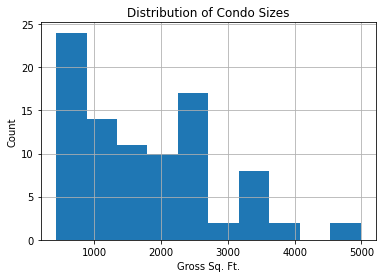

In [6]:
import matplotlib.pyplot as plt
df['GROSS_SQUARE_FEET'].hist()
plt.xlabel('Gross Sq. Ft.')
plt.ylabel('Count')
plt.title('Distribution of Condo Sizes');

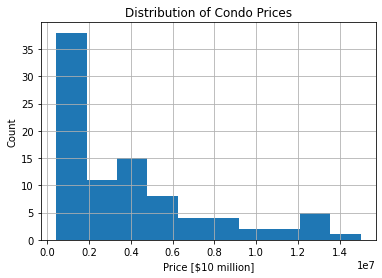

In [7]:
df['SALE_PRICE'].hist()
plt.xlabel('Price [$10 million]')
plt.ylabel('Count')
plt.title('Distribution of Condo Prices');

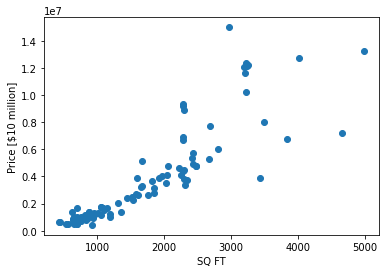

In [8]:
plt.scatter(df['GROSS_SQUARE_FEET'], df['SALE_PRICE'])
plt.xlabel('SQ FT')
plt.ylabel('Price [$10 million]');

# II. Split Data

Split our **feature matrix** and our **target vector**

In [9]:
# target vector (one-dimentional)
target = 'SALE_PRICE'
y = df[target]

# feature matrix (two-dimentional)
X = df[['GROSS_SQUARE_FEET']]

In [10]:
print('y shape:', y.shape)
print('X shape:', X.shape)

y shape: (90,)
X shape: (90, 1)


In [11]:
X.head()

,GROSS_SQUARE_FEET
SALE_DATE,
2019-01-03,1840.0
2019-01-07,1759.0
2019-01-09,1190.0
2019-01-10,1088.0
2019-01-11,873.0


# III. Establish a Baseline

If you had a *naïve model* that could only predict one value, how well would you model perform?

In [12]:
y_pred = [y.mean()] * len(y)
y_pred[:5]

[3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667,
 3928736.3666666667]

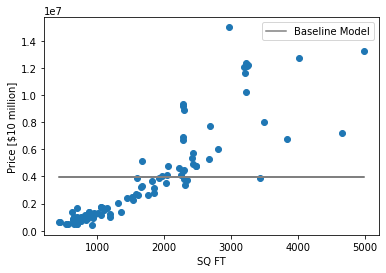

In [13]:
plt.scatter(df['GROSS_SQUARE_FEET'], df['SALE_PRICE'])
plt.plot(df['GROSS_SQUARE_FEET'], 
         y_pred, 
         label='Baseline Model', 
         color='grey')
plt.xlabel('SQ FT')
plt.ylabel('Price [$10 million]')
plt.legend();

In [14]:
(y_pred - y).abs().mean()

2783380.1977777793

In [15]:
from sklearn.metrics import mean_absolute_error

print('Baseline MAE:', mean_absolute_error(y, y_pred))

Baseline MAE: 2783380.1977777784


# IV. Build Model

In [16]:
# Step 1 import your predictor class

from sklearn.linear_model import LinearRegression

# Step 2: Instantiate your predictor
model = LinearRegression()

# Step 3: Fit your predictor on the training data by passing feature matrix, target vector
model.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
# predict using the .predict function
model.predict([[1000], [1500], [2000]])

array([1571083.61456045, 3109307.44226995, 4647531.26997945])

# V. Check Our Metrics

In [20]:
# y_pred 
y_pred = model.predict(X)

In [31]:
 print('Training MAE --> ',mean_absolute_error(y,y_pred))
type(y_pred), y_pred.shape, y_pred[:20]

Training MAE -->  1176817.9930150746


(numpy.ndarray,
 (90,),
 array([ 4155299.64511241,  3906107.38502347,  2155608.66909006,
         1841811.00823732,  1180374.76232224,  5505860.16584135,
          632767.07965766,  2952408.61184358,  5505860.16584135,
         8422332.54317857,  5413566.73617879, 12840111.37636026,
        13833803.96906059,  5988862.44774214,  4401415.45754593,
         -176338.65371754,  4841347.47227085,  8363880.03772561,
         1164992.52404514,  5505860.16584135]))

# VI. Communicate Results

In [32]:
model.coef_, model.intercept_

(array([3076.44765542]), -1505364.0408585514)

In [34]:
f'SALE_PRICE = {model.intercept_} + {model.coef_[0]}(SQFT)'

'SALE_PRICE = -1505364.0408585514 + 3076.4476554190023(SQFT)'

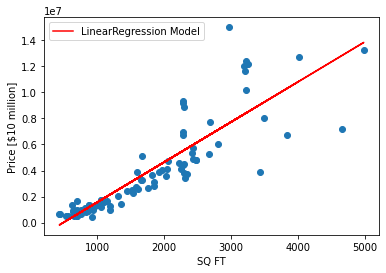

In [35]:
plt.scatter(df['GROSS_SQUARE_FEET'], df['SALE_PRICE'])
plt.plot(df['GROSS_SQUARE_FEET'], 
         y_pred, 
         label='LinearRegression Model', 
         color='red')
plt.xlabel('SQ FT')
plt.ylabel('Price [$10 million]')
plt.legend();

In [36]:
model.rank_

1

In [37]:
model.singular_

array([9610.86076386])